In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import koreanize_matplotlib
import re

In [2]:
df = pd.read_csv('data/kpa215.csv')
print(df.shape)
df.head(5)

(46268, 9)


,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부
0,충남청,2020-12-01 15:06:38,충남청,종결요청,남성,충청남도 아산시 온천동(온양1동) 1556(신학산텔레콤),127.001705,36.786898,NaN
1,충남청,2020-12-01 14:53:20,충남청,종결요청,여성,충청남도 공주시 우성면 동대리(행정:우성면) 173,127.052120,36.470196,NaN
2,충남청,2020-12-01 11:15:43,충남청,종결요청,여성,충청남도 공주시 반포면 공암리(행정:반포면),127.251164,36.395766,NaN
3,충남청,2020-12-01 13:08:09,충남청,종결요청,남성,충청남도 아산시 음봉면 삼거리(행정:음봉면) 203-3,127.012487,36.849074,NaN
4,충남청,2020-12-01 14:00:07,충남청,종결요청,남성,충청남도 천안시 동남구 다가동(일봉동) 354-1(농협중앙회봉명지점),127.140700,36.802345,NaN


In [3]:
df.sort_values('접수완료일시', ignore_index=True, inplace=True)
df.loc[df['접수부서'].str.contains('대전'), '접수부서'] = '대전청'
df.loc[df['접수부서'].str.contains('세종'), '접수부서'] = '세종청'

In [4]:
df['접수완료일시'] = df['접수완료일시'].apply(lambda x: pd.to_datetime(x))
df['date'] = df['접수완료일시'].dt.date
df['year'] = df['접수완료일시'].dt.year
df['month'] = df['접수완료일시'].dt.month
df['day'] = df['접수완료일시'].dt.day
df['hour'] = df['접수완료일시'].dt.hour
df['ym'] = df['접수완료일시'].dt.strftime('%Y-%m')
# df['ym'] = df['year'].astype('str') + '-' + df['month'].astype('str')
df['weekofday'] = df['접수완료일시'].dt.day_name()

In [5]:
df['weekofday'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [6]:
wod = {'Monday':'월', 'Thursday':'화', 'Wednesday':'수', 'Tuesday':'목', 'Friday':'금', 'Saturday':'토', 'Sunday':'일'}
df['weekofday'] = df['weekofday'].map(wod)

In [97]:
df = df[df['ym'] < '2023']

In [98]:
df

,접수부서,접수완료일시,경찰청구분,사건상태,성별,발생지점,발생좌표X,발생좌표Y,동일사건여부,date,year,month,day,hour,ym,weekofday
0,충남청,2020-01-02 09:33:49,충남청,종결요청,불상,충청남도 천안시 서북구 차암동(부성2동) 524,127.104436,36.841583,NaN,2020-01-02,2020,1,2,9,2020-01,화
1,충남청,2020-01-02 09:42:45,충남청,종결요청,불상,충청남도 아산시 풍기동(행정:온양6동) 404-33,127.021875,36.771208,NaN,2020-01-02,2020,1,2,9,2020-01,화
2,충남청,2020-01-02 10:23:29,충남청,종결요청,불상,충청남도 서산시 대산읍 대산리(행정:대산읍) 688-1,126.426100,36.947617,NaN,2020-01-02,2020,1,2,10,2020-01,화
3,대전청,2020-01-02 10:46:31,대전청,종결요청,불상,대전광역시 유성구 대정동(행정:진잠동) 1-4,127.336373,36.317773,NaN,2020-01-02,2020,1,2,10,2020-01,화
4,충남청,2020-01-02 11:00:20,충남청,종결요청,불상,충청남도 논산시 내동(행정:취암동) 1113,127.104068,36.182762,NaN,2020-01-02,2020,1,2,11,2020-01,화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45709,충남청,2022-12-31 11:47:45,충남청,종결요청,여성,충청남도 아산시 모종동 (행정:온양3동 ) 551-2,127.012487,36.787331,NaN,2022-12-31,2022,12,31,11,2022-12,토
45710,충남청,2022-12-31 11:54:41,충남청,종결요청,남성,충청남도 천안시 서북구 두정동 (행정:부성1동 ) 1596,127.145864,36.838048,NaN,2022-12-31,2022,12,31,11,2022-12,토
45711,충남청,2022-12-31 13:08:14,충남청,종결요청,불상,충청남도 천안시 동남구 병천면 가전리(병천면 ) 206-5,127.282362,36.769084,NaN,2022-12-31,2022,12,31,13,2022-12,토
45712,충남청,2022-12-31 16:20:27,충남청,종결요청,여성,NaN,NaN,NaN,NaN,2022-12-31,2022,12,31,16,2022-12,토


## EDA

In [99]:
ym = df.groupby(by=['접수부서','ym'])['접수완료일시'].agg(['count'])

In [100]:
ym

count
접수부서 ym            
대전청  2020-01    350
     2020-02    320
     2020-03    312
     2020-04    340
     2020-05    299
...             ...
충남청  2022-08   1074
     2022-09    914
     2022-10   1099
     2022-11   1194
     2022-12    911

[86 rows x 1 columns]

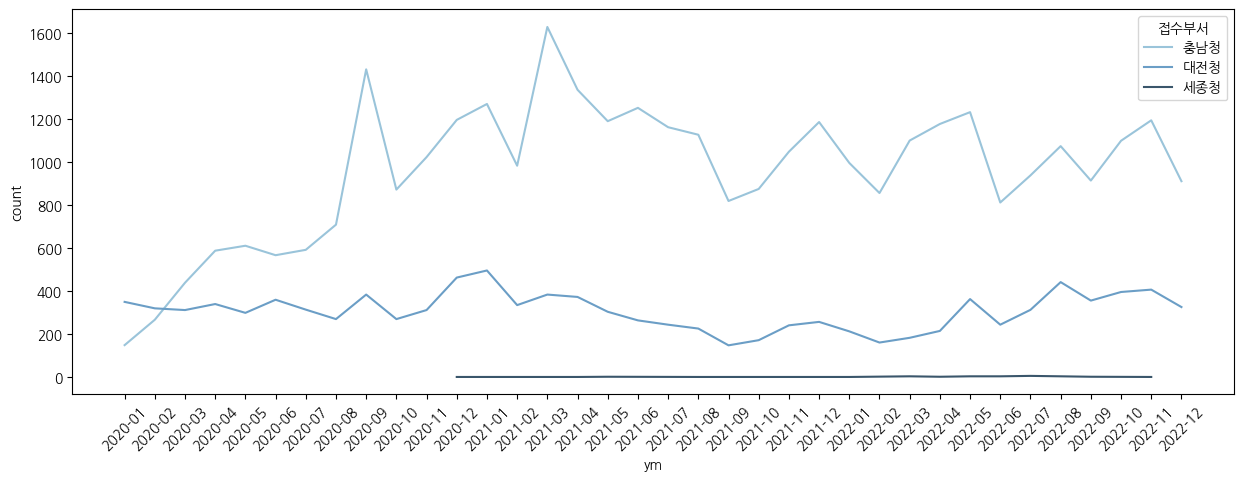

In [101]:
# palette = 'dark:b_r'
plt.figure(figsize=(15,5))
colors = ['#9AC4DA', '#6B9EC6', '#3A566B']
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=ym, x='ym', y='count', hue='접수부서', hue_order=['충남청', '대전청', '세종청'])
plt.xticks(rotation=45);

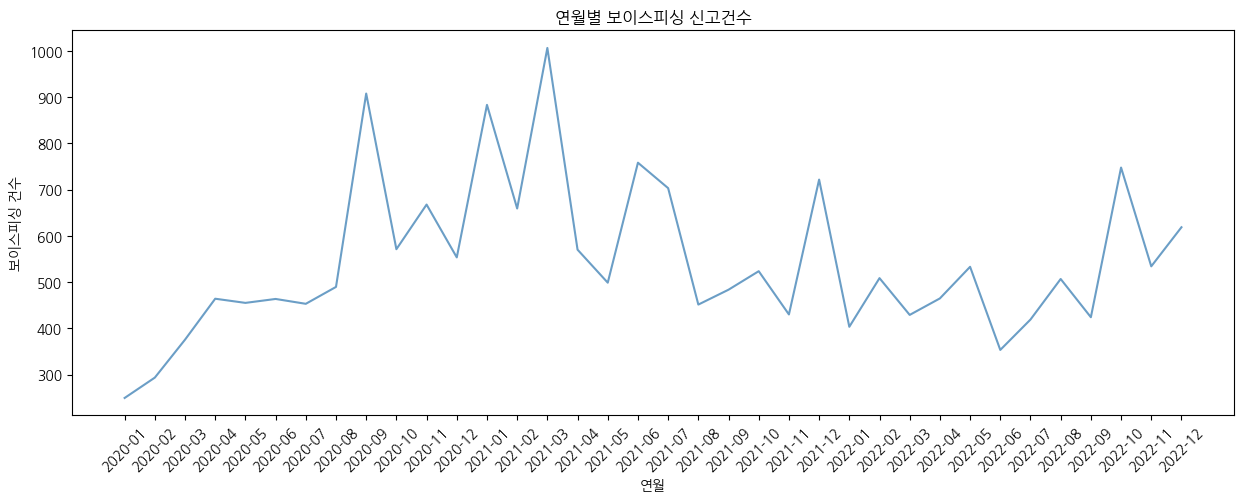

In [103]:
plt.figure(figsize=(15,5))
sns.lineplot(data=ym, x='ym', y='count', color='#6B9EC6', errorbar=None)
plt.xticks(rotation=45);
plt.ylabel('보이스피싱 건수')
plt.xlabel('연월')
plt.title('연월별 보이스피싱 신고건수');

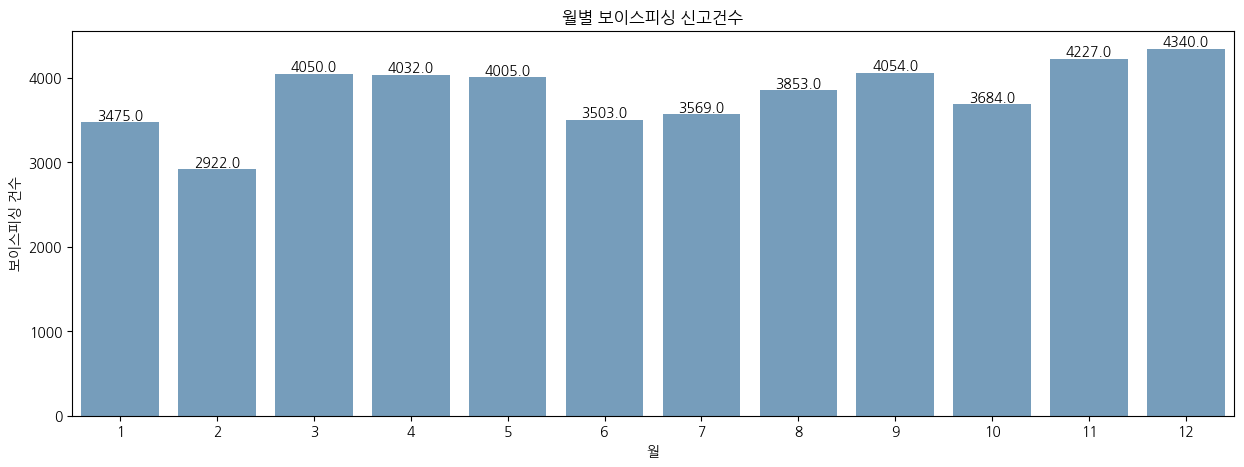

In [154]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='month', color='#6B9EC6')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height*1.01, height, ha = 'center', size = 10)
plt.ylabel('보이스피싱 건수')
plt.xlabel('월')
plt.title('월별 보이스피싱 신고건수');

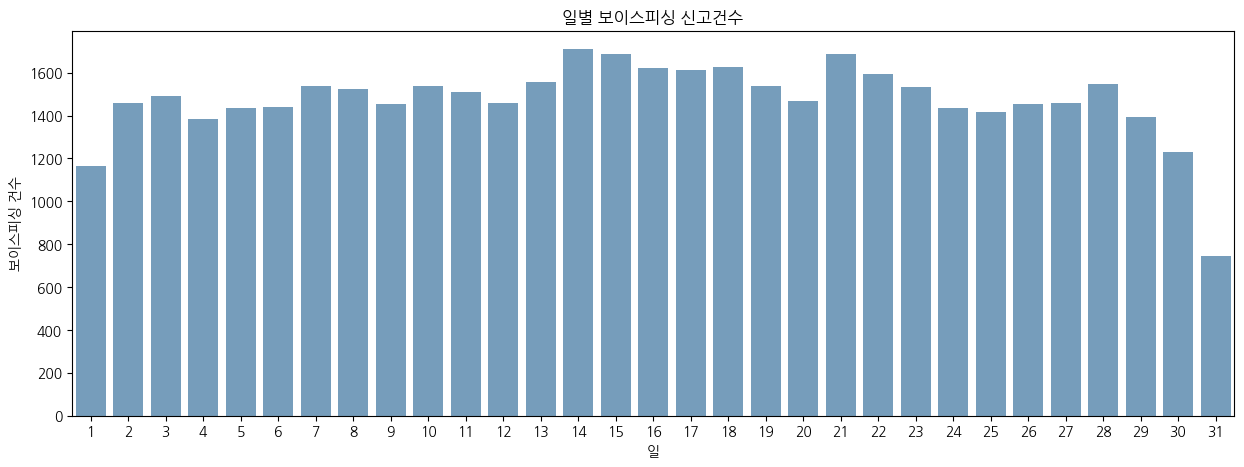

In [155]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='day', color='#6B9EC6')
plt.ylabel('보이스피싱 건수')
plt.xlabel('일')
plt.title('일별 보이스피싱 신고건수');

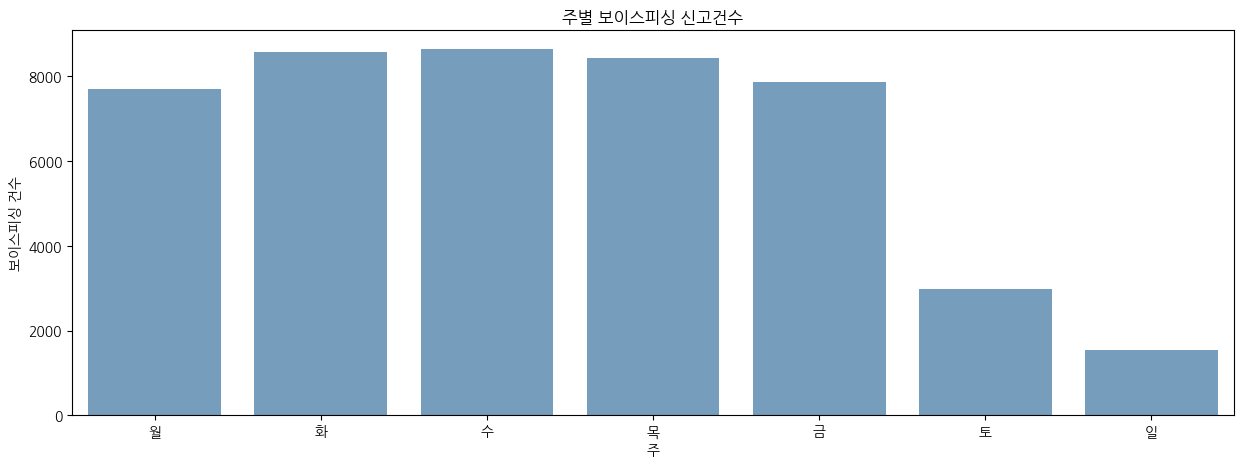

In [157]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='weekofday',order=['월','화','수','목','금','토','일'], color='#6B9EC6')
plt.ylabel('보이스피싱 건수')
plt.xlabel('주')
plt.title('주별 보이스피싱 신고건수');

#### 평일

In [107]:
df_평일 = df[~df['weekofday'].isin(['토','일'])]

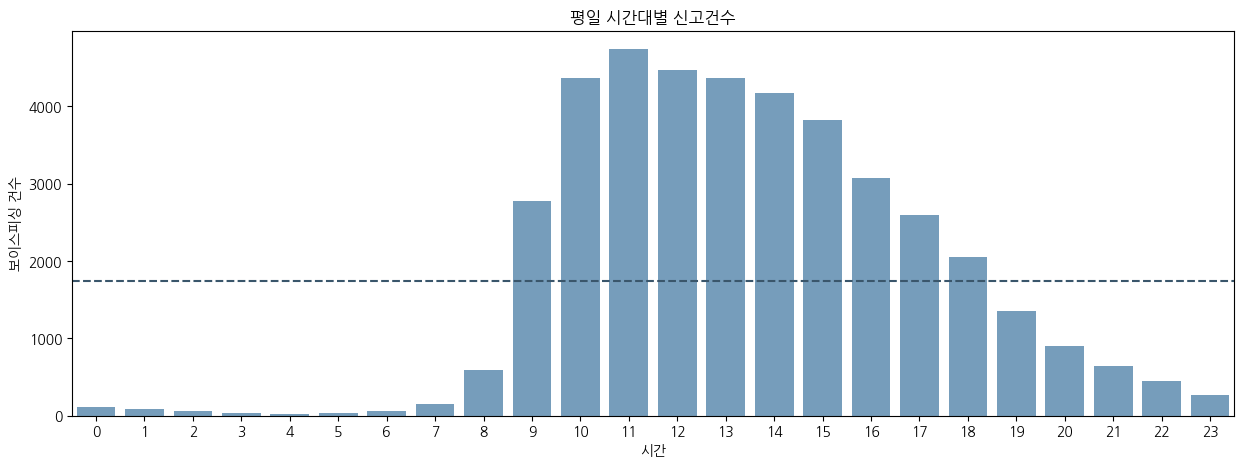

In [163]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_평일, x='hour', color='#6B9EC6')
plt.axhline(1737, color='#3A566B', linestyle='--')
plt.ylabel('보이스피싱 건수')
plt.xlabel('시간')
plt.title('평일 시간대별 신고건수');

#### 주말

In [109]:
df_주말 = df[df['weekofday'].isin(['토','일'])]

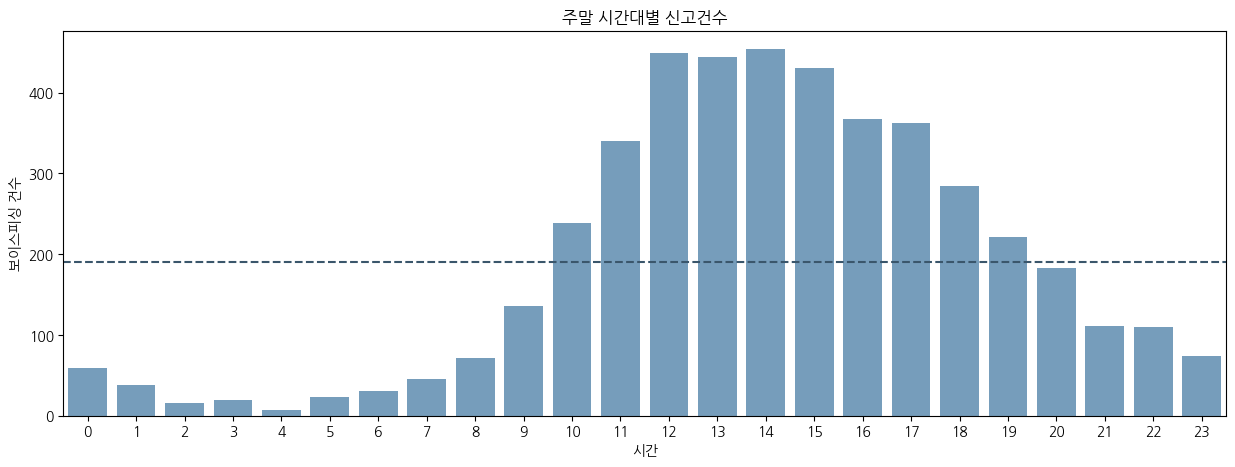

In [164]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_주말, x='hour', color='#6B9EC6')
plt.axhline(190, color='#3A566B', linestyle='--')
plt.ylabel('보이스피싱 건수')
plt.xlabel('시간')
plt.title('주말 시간대별 신고건수');

In [111]:
df_주말.groupby('hour')['접수부서'].agg(['count']).mean()

count    188.125
dtype: float64

In [112]:
평일 = df_평일.groupby('hour')['접수부서'].agg(['count'])
주말 = df_주말.groupby('hour')['접수부서'].agg(['count'])

In [113]:
평일['평일_per'] = round((평일 / 평일.sum()) * 100, 2)
주말['주말_per'] = round((주말 / 주말.sum()) * 100,2)

In [114]:
week = pd.concat([평일, 주말], axis=1)
week['per'] = round(week['평일_per'] - week['주말_per'], 2)

In [115]:
display(week[['평일_per','주말_per','per']].sort_values('per', ascending=False).head(3))
display(week[['평일_per','주말_per','per']].sort_values('per', ascending=False).tail(3))

,평일_per,주말_per,per
hour,,,
10,10.59,5.29,5.30
11,11.50,7.53,3.97
9,6.74,3.01,3.73


,평일_per,주말_per,per
hour,,,
19,3.27,4.89,-1.62
17,6.31,8.04,-1.73
20,2.18,4.05,-1.87


<AxesSubplot: xlabel='hour', ylabel='count'>

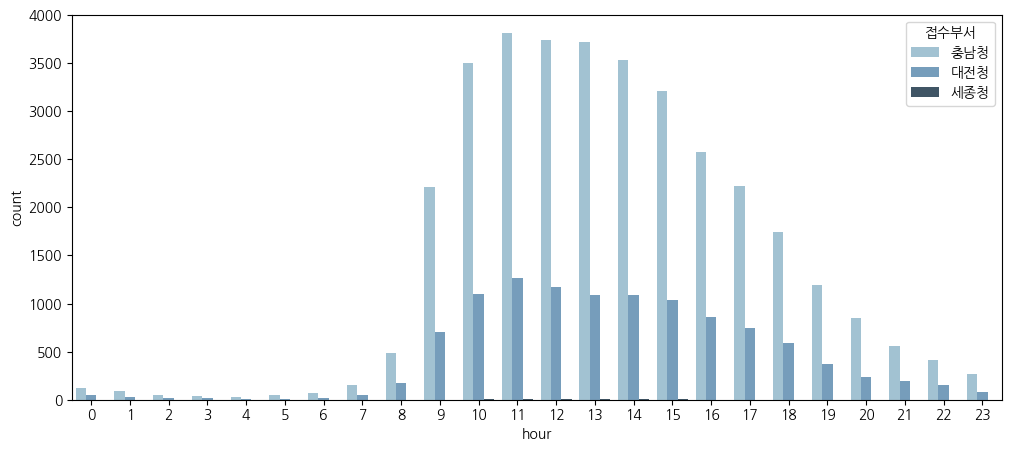

In [116]:
plt.figure(figsize=(12,5))
colors = ['#9AC4DA', '#6B9EC6', '#3A566B']
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=df, x='hour', hue='접수부서', hue_order=['충남청', '대전청', '세종청'])

* 해당 데이터는 신고접수 데이터. 고로 순찰 강화를 통해 신고 전에 예방하는 것이 이번 보고서 기획 목표
* EDA에 나오는 결과보다 조금 이른 시간대인 8시부터 보이스피싱을 당한다고 생각해 볼 수 있음.

### 충남청

In [117]:
df_충남 = df[df['접수부서'] == '충남청']

In [118]:
# 경찰청 구분으로 전처리 하면 다양한 지역이 섞여있음
#신고_충남 = df_충남[df_충남['경찰청구분'] == '충남청']

In [119]:
# 발생지점에서 충청남도 지역만 분류하여 EDA
신고_충남 = df_충남.dropna(subset='발생지점')

In [120]:
def 삭제(x):
    pattern = r'\([^)]*\)'
    text = re.sub(pattern=pattern, repl='', string= x)
    return text

In [121]:
신고_충남['발생지점'] = 신고_충남['발생지점'].map(삭제)

In [122]:
def 충청(x):
    if x.split(' ')[0] == '충청남도':
        return x.split(' ')[1]
    else:
        return np.nan

In [123]:
신고_충남['발생구역'] = 신고_충남['발생지점'].map(충청)

In [124]:
신고_충남.dropna(subset='발생구역', inplace=True)
신고_충남.reset_index(inplace=True)

In [125]:
신고_충남['발생구역'].unique()

array(['천안시', '아산시', '서산시', '논산시', '홍성군', '서천군', '금산군', '공주시', '계룡시',
       '당진시', '예산군', '태안군', '부여군', '청양군', '보령시'], dtype=object)

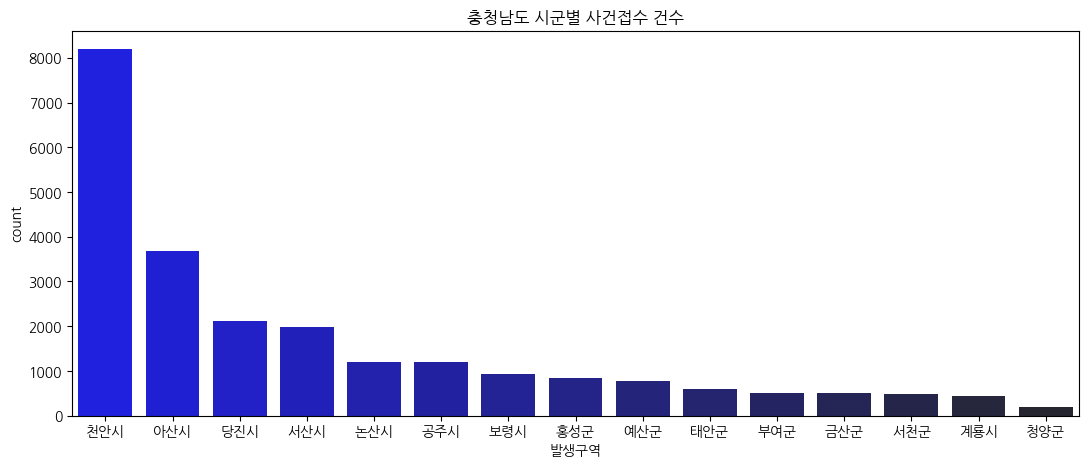

In [126]:
palette = 'dark:b_r'
plt.figure(figsize=(13,5))
sns.countplot(data=신고_충남, x='발생구역', order=신고_충남.groupby('발생구역')['접수부서'].count().sort_values(ascending=False).index, palette=palette)
plt.title('충청남도 시군별 사건접수 건수');

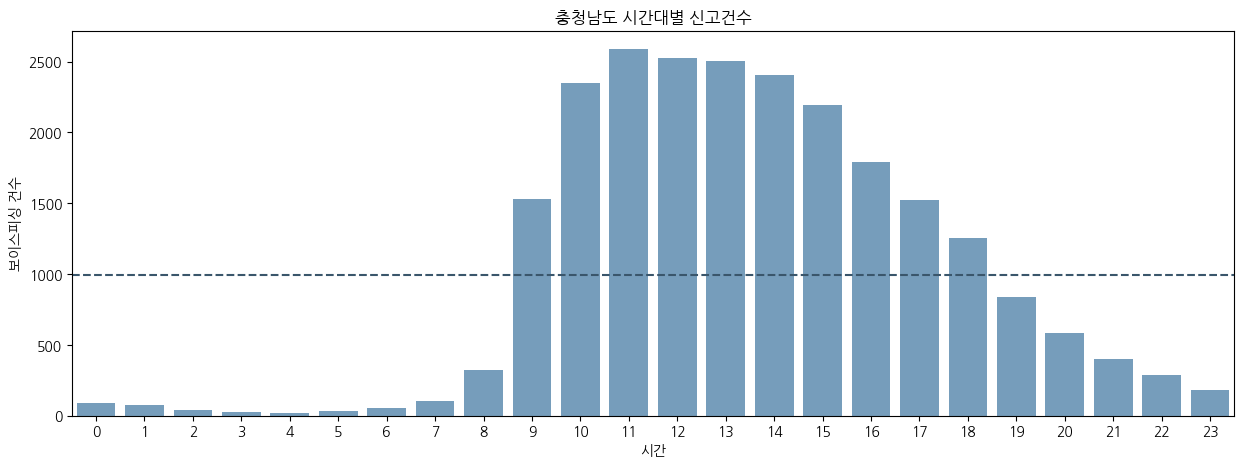

In [167]:
plt.figure(figsize=(15,5))
sns.countplot(data=신고_충남, x='hour', color='#6B9EC6')
plt.axhline(995, color='#3A566B', linestyle='--')
plt.ylabel('보이스피싱 건수')
plt.xlabel('시간')
plt.title('충청남도 시간대별 신고건수');

In [128]:
신고_충남.groupby('hour')['접수부서'].agg(['count']).mean()

count    988.75
dtype: float64

In [129]:
충남_hour = 신고_충남.groupby('hour')['접수부서'].agg(['count'])
충남_hour['충남_per'] = round(충남_hour/충남_hour.sum() * 100,2)

In [130]:
충남_hour

,count,충남_per
hour,,
0,88,0.37
1,73,0.31
2,41,0.17
3,26,0.11
4,17,0.07
5,35,0.15
6,53,0.22
7,103,0.43
8,326,1.37


### 대전청

In [131]:
df_대전 = df[df['접수부서'] == '대전청']

In [132]:
신고_대전 = df_대전.dropna(subset='발생지점')

In [133]:
def 대전(x):
    if x.split(' ')[0] == '대전광역시':
        return x.split(' ')[1]
    else:
        return np.nan

In [134]:
신고_대전['발생구역'] = 신고_대전['발생지점'].map(대전)

In [135]:
신고_대전.dropna(subset='발생구역', inplace=True)
신고_대전.reset_index(inplace=True)

In [136]:
신고_대전['발생구역'].unique()

array(['유성구', '동구', '서구', '대덕구', '중구'], dtype=object)

Text(0.5, 1.0, '대전 구별 사건접수 건수')

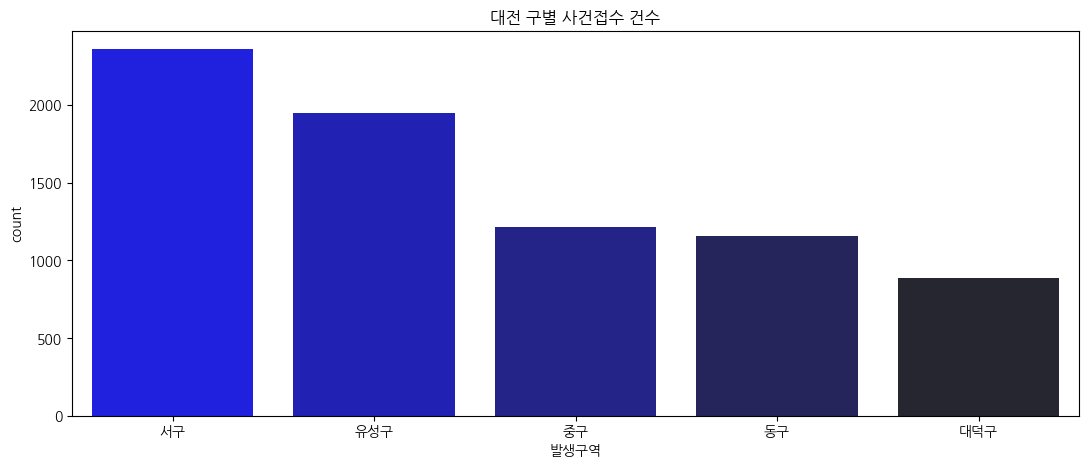

In [137]:
plt.figure(figsize=(13,5))
sns.countplot(data=신고_대전, x='발생구역', order=신고_대전.groupby('발생구역')['접수부서'].count().sort_values(ascending=False).index, palette=palette)
plt.title('대전 구별 사건접수 건수')

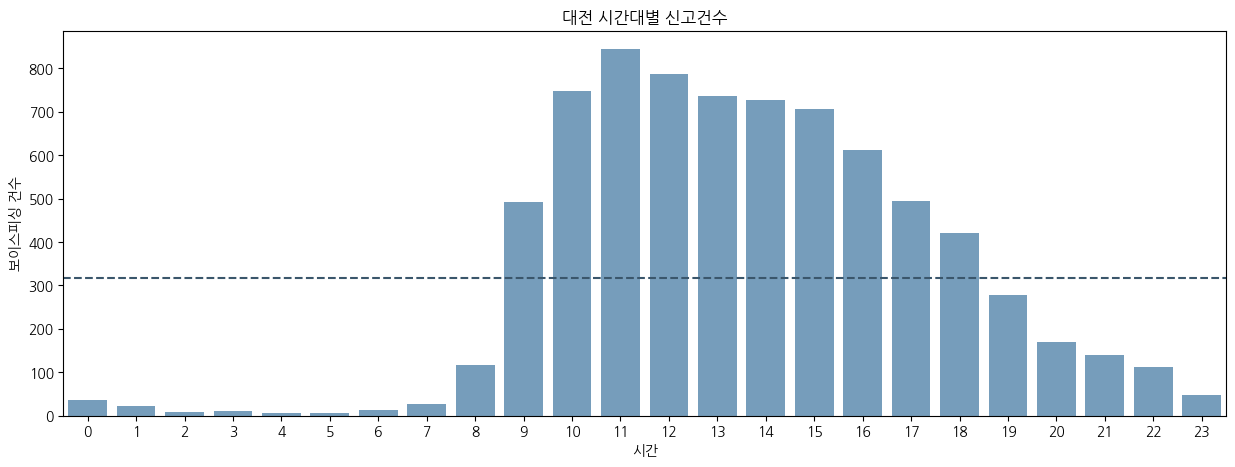

In [168]:
plt.figure(figsize=(15,5))
sns.countplot(data=신고_대전, x='hour', color='#6B9EC6')
plt.axhline(318, color='#3A566B', linestyle='--')
plt.ylabel('보이스피싱 건수')
plt.xlabel('시간')
plt.title('대전 시간대별 신고건수');

In [139]:
신고_대전.groupby('hour')['접수부서'].agg(['count']).mean()

count    315.208333
dtype: float64

In [140]:
대전_hour = 신고_대전.groupby('hour')['접수부서'].agg(['count'])
대전_hour['대전_per'] = round(대전_hour/대전_hour.sum() * 100,2)

In [141]:
대전_hour

,count,대전_per
hour,,
0,36,0.48
1,22,0.29
2,9,0.12
3,10,0.13
4,6,0.08
5,6,0.08
6,14,0.19
7,28,0.37
8,116,1.53


In [142]:
con = pd.concat([충남_hour, 대전_hour], axis=1)

In [143]:
con['per'] = round(con['충남_per'] - con['대전_per'],2)

In [144]:
display(con[['충남_per', '대전_per', 'per']].sort_values('per', ascending=False).head(3))
display(con[['충남_per', '대전_per', 'per']].sort_values('per', ascending=False).tail(3))

,충남_per,대전_per,per
hour,,,
13,10.56,9.73,0.83
14,10.13,9.60,0.53
12,10.64,10.40,0.24


,충남_per,대전_per,per
hour,,,
22,1.21,1.49,-0.28
18,5.28,5.57,-0.29
16,7.56,8.09,-0.53


### 세종청

In [145]:
df_세종 = df[df['접수부서'] == '세종청']

In [146]:
신고_세종 = df_세종.dropna(subset='발생지점')

In [147]:
def 세종(x):
    if x.split(' ')[0] == '세종특별자치시':
        return x.split(' ')[2]
    else:
        return np.nan

In [148]:
신고_세종['발생구역'] = 신고_세종['발생지점'].map(세종)

In [149]:
신고_세종.dropna(subset='발생구역', inplace=True)
신고_세종.reset_index(inplace=True)

In [150]:
신고_세종['발생구역'].unique()

array(['한솔동(행정:한솔동)', '도담동(도담동)', '연기면', '보람동(보람동)'], dtype=object)

<AxesSubplot: xlabel='발생구역', ylabel='count'>

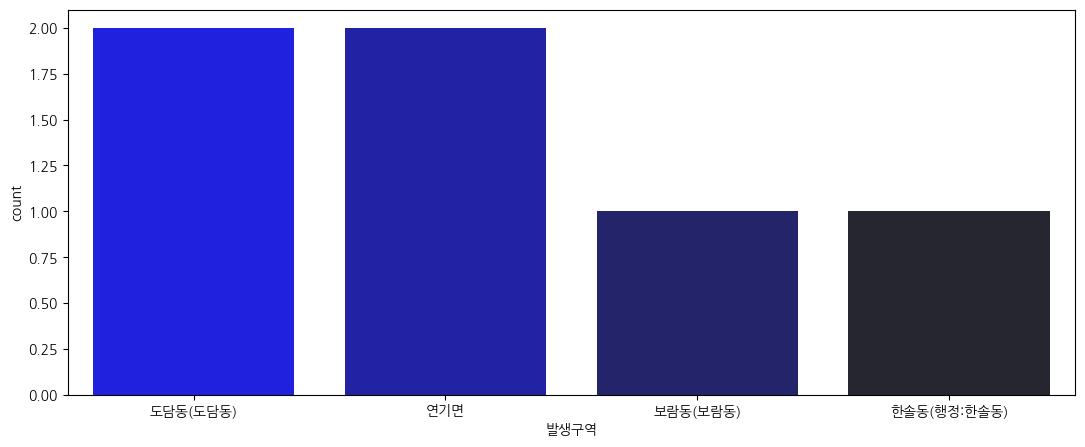

In [151]:
plt.figure(figsize=(13,5))
sns.countplot(data=신고_세종, x='발생구역', order=신고_세종.groupby('발생구역')['접수부서'].count().sort_values(ascending=False).index, palette=palette)

<AxesSubplot: xlabel='hour', ylabel='count'>

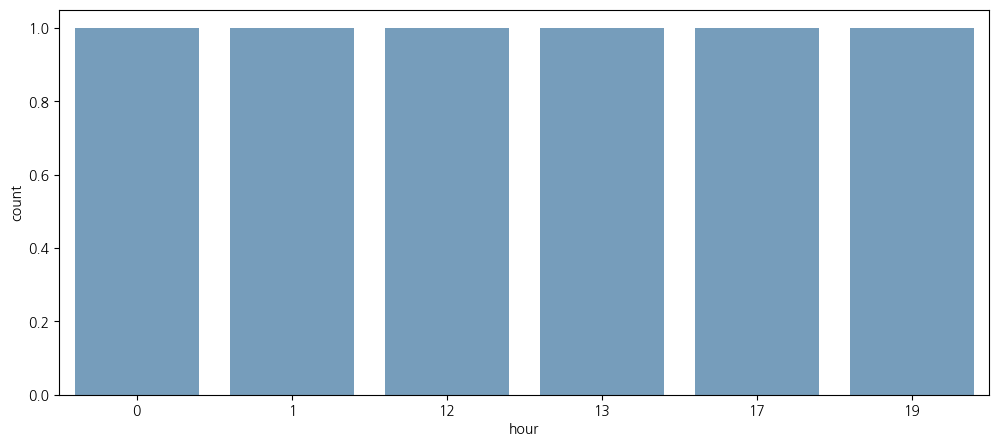

In [152]:
plt.figure(figsize=(12,5))
sns.countplot(data=신고_세종, x='hour', color='#6B9EC6')

* 세종특별자치시 내에서 신고접수 데이터가 많이 부족하여 분석이 힘듬